In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pydataset import data

In [2]:
df = data('mpg')
df.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


# Filtering

In [4]:
is_audi = df.manufacturer == 'audi'
is_audi
#here's your damn boolean mask

1       True
2       True
3       True
4       True
5       True
       ...  
230    False
231    False
232    False
233    False
234    False
Name: manufacturer, Length: 234, dtype: bool

In [6]:
city_greater_than_20 = df.cty > 20
city_greater_than_20.head()
#now we have 2 series of booleans

1    False
2     True
3    False
4     True
5    False
Name: cty, dtype: bool

In [8]:
#filter only audis with cty > 20
#build multiple boolean arrays and combine with & or |
#see indexing and substting in pandas series lesson
#select * from df where manufacturer = 'audi' and 'cty' >20, in sql syntax
df[is_audi & city_greater_than_20]

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact


In [10]:
df[(df.cty > 20) & (df.manufacturer == 'audi')]

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact


In [11]:
#another approach is to whittle down by each condition
audi = df[df.manufacturer == 'audi']
audi[audi.cty>20]

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact


In [12]:
#class is a reserved word, so we need to do df["class"] (bracket syntax) or rename it
df.class

SyntaxError: invalid syntax (<ipython-input-12-36d12d4c0713>, line 2)

In [13]:
df['class']

1      compact
2      compact
3      compact
4      compact
5      compact
        ...   
230    midsize
231    midsize
232    midsize
233    midsize
234    midsize
Name: class, Length: 234, dtype: object

In [14]:
#where do we find reserved words? hit df. and then 'tab' to get some options
df.



SyntaxError: invalid syntax (<ipython-input-14-bb0788b0ac0b>, line 2)

# Crosstabs vs pivot tables
- ctabs are summations of categoryA by categoryB
- pivot tables are any knid of aggregation of a valueC by catA vs catB

In [15]:
df.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [16]:
pd.crosstab(df.manufacturer, df['class'])
#tthe number of audis that are compact is 15, midsize is 3
#instead of each row being a single, specific vehicle,
#each row of a crosstab is each value of catA
#each col of a ctab is each value of catB
#each field/intersection is the count of rows that belong to CatA and CatB

class,2seater,compact,midsize,minivan,pickup,subcompact,suv
manufacturer,,,,,,,
audi,0,15,3,0,0,0,0
chevrolet,5,0,5,0,0,0,9
dodge,0,0,0,11,19,0,7
ford,0,0,0,0,7,9,9
honda,0,0,0,0,0,9,0
hyundai,0,0,7,0,0,7,0
jeep,0,0,0,0,0,0,8
land rover,0,0,0,0,0,0,4
lincoln,0,0,0,0,0,0,3


In [21]:
#pd.pivot_table(df, index='catA', columns='catB', values='numeric colA')
#as such, we get lots of holes, and all columns
pd.pivot_table(df, index='manufacturer', columns='class', values='cty') #add 'hwy' as an additional value to get more, but it gets to be too much info
#pivot table defaults to the mean of the values arg/col we specify
#NaNs mean no 2seater audis or vw pickups
#Avg city mileage for compact audis is 17.9
#Avg city mileage for dodge minivans  is 15.8

class,2seater,compact,midsize,minivan,pickup,subcompact,suv
manufacturer,,,,,,,
audi,NaN,17.933333,16.000000,NaN,NaN,NaN,NaN
chevrolet,15.4,NaN,18.800000,NaN,NaN,NaN,12.666667
dodge,NaN,NaN,NaN,15.818182,12.052632,NaN,11.857143
ford,NaN,NaN,NaN,NaN,13.000000,15.888889,12.888889
honda,NaN,NaN,NaN,NaN,NaN,24.444444,NaN
hyundai,NaN,NaN,19.000000,NaN,NaN,18.285714,NaN
jeep,NaN,NaN,NaN,NaN,NaN,NaN,13.500000
land rover,NaN,NaN,NaN,NaN,NaN,NaN,11.500000
lincoln,NaN,NaN,NaN,NaN,NaN,NaN,11.333333


In [20]:
#the avg cty mileage for a compact audi
#compare this single subsetting to the pivot table
df[(df.manufacturer == 'audi') & (df['class'] == 'compact')].cty.mean()

17.933333333333334

<AxesSubplot:xlabel='class', ylabel='manufacturer'>

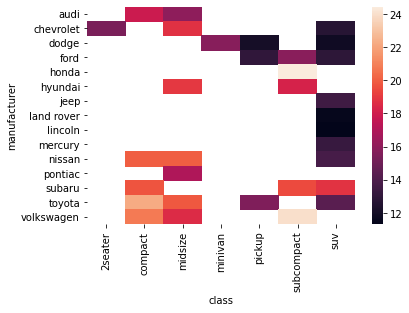

In [22]:
sns.heatmap(data = pd.pivot_table(df, index='manufacturer', columns='class', values='cty'))

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

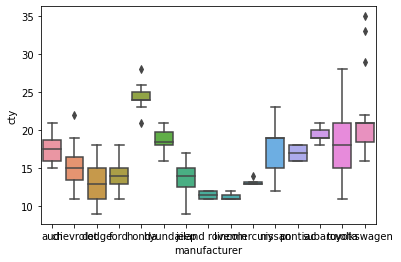

In [24]:
sns.boxplot(x='manufacturer', y='cty', data= df)
plt.tight_layout

# Pandas series exercise

In [25]:
#how many vowels in the series?
#how many consonants?
string =     'hnvidduckkqxwymbimkccexbkmqygkxoyndmcxnwqarhyffsjpsrabtjzsypmzadfavyrnndndvswreauxovncxtwzpwejilzjrmmbbgbyxvjtewqthafnbkqplarokkyydtubbmnexoypulzwfhqvckdpqtpoppzqrmcvhhpwgjwupgzhiofohawytlsiyecuproguy'
string

'hnvidduckkqxwymbimkccexbkmqygkxoyndmcxnwqarhyffsjpsrabtjzsypmzadfavyrnndndvswreauxovncxtwzpwejilzjrmmbbgbyxvjtewqthafnbkqplarokkyydtubbmnexoypulzwfhqvckdpqtpoppzqrmcvhhpwgjwupgzhiofohawytlsiyecuproguy'

In [27]:
letters = list(string)
letters

['h',
 'n',
 'v',
 'i',
 'd',
 'd',
 'u',
 'c',
 'k',
 'k',
 'q',
 'x',
 'w',
 'y',
 'm',
 'b',
 'i',
 'm',
 'k',
 'c',
 'c',
 'e',
 'x',
 'b',
 'k',
 'm',
 'q',
 'y',
 'g',
 'k',
 'x',
 'o',
 'y',
 'n',
 'd',
 'm',
 'c',
 'x',
 'n',
 'w',
 'q',
 'a',
 'r',
 'h',
 'y',
 'f',
 'f',
 's',
 'j',
 'p',
 's',
 'r',
 'a',
 'b',
 't',
 'j',
 'z',
 's',
 'y',
 'p',
 'm',
 'z',
 'a',
 'd',
 'f',
 'a',
 'v',
 'y',
 'r',
 'n',
 'n',
 'd',
 'n',
 'd',
 'v',
 's',
 'w',
 'r',
 'e',
 'a',
 'u',
 'x',
 'o',
 'v',
 'n',
 'c',
 'x',
 't',
 'w',
 'z',
 'p',
 'w',
 'e',
 'j',
 'i',
 'l',
 'z',
 'j',
 'r',
 'm',
 'm',
 'b',
 'b',
 'g',
 'b',
 'y',
 'x',
 'v',
 'j',
 't',
 'e',
 'w',
 'q',
 't',
 'h',
 'a',
 'f',
 'n',
 'b',
 'k',
 'q',
 'p',
 'l',
 'a',
 'r',
 'o',
 'k',
 'k',
 'y',
 'y',
 'd',
 't',
 'u',
 'b',
 'b',
 'm',
 'n',
 'e',
 'x',
 'o',
 'y',
 'p',
 'u',
 'l',
 'z',
 'w',
 'f',
 'h',
 'q',
 'v',
 'c',
 'k',
 'd',
 'p',
 'q',
 't',
 'p',
 'o',
 'p',
 'p',
 'z',
 'q',
 'r',
 'm',
 'c',
 'v',
 'h'

In [28]:
letters=pd.Series(letters)
letters


0      h
1      n
2      v
3      i
4      d
      ..
195    r
196    o
197    g
198    u
199    y
Length: 200, dtype: object

In [30]:
#now, we can use our vectoriezation operations
#how many vowels?
letters.isin(['aeiou'])
#here's a b mask

0      False
1      False
2      False
3      False
4      False
       ...  
195    False
196    False
197    False
198    False
199    False
Length: 200, dtype: bool

In [33]:
len(letters[letters.isin(['a','e','i','o','u'])])

34

In [34]:
#use .apply
#step one: blow off anything to do w series
#2: isolate the dtype of a single value
#3: write a f(x) that does the thing you need (on a single value)
#4: pass the function name into .apply

def is_vowel(letter):
    letter=letter.lower()
    return letter in ['a','e','i','o','u']

letters.apply(is_vowel)

0      False
1      False
2      False
3       True
4      False
       ...  
195    False
196     True
197    False
198     True
199    False
Length: 200, dtype: bool

In [37]:
#letters[letters.apply(is_vowel)]
len(letters[letters.apply(is_vowel)])

34

# DONT FORGET THE ABOVE EXCELLENT EXPLANATION OF BOOLEAN MASKING AND .APPLY METHOD